In [1]:
%matplotlib notebook

import numpy as np
from astropy.nddata import CCDData
from astropy import units as u
from ccdproc import trim_image

In [2]:
lamp = 'apo05/05may31.0035r.fits' # HeNeAr lamp

img = CCDData.read(lamp, unit=u.adu)
# put in units of ADU/s
img.data = img.data / (img.header['EXPTIME'])
img.unit = u.adu / u.s

# trim off bias section
img = trim_image(img, fits_section=img.header['DATASEC'])

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [3]:
# this data comes from the APO DIS red channel, which has wavelength axis backwards
# (despite not mentioning in the header)
wapprox = (np.arange(img.shape[1]) - img.shape[1]/2)[::-1] * img.header['DISPDW'] + img.header['DISPWC']

flux = np.nanmean(img[500:525,:], axis=0) - np.nanmedian(img)

In [4]:
from identify import identify_widget

<IPython.core.display.Javascript object>


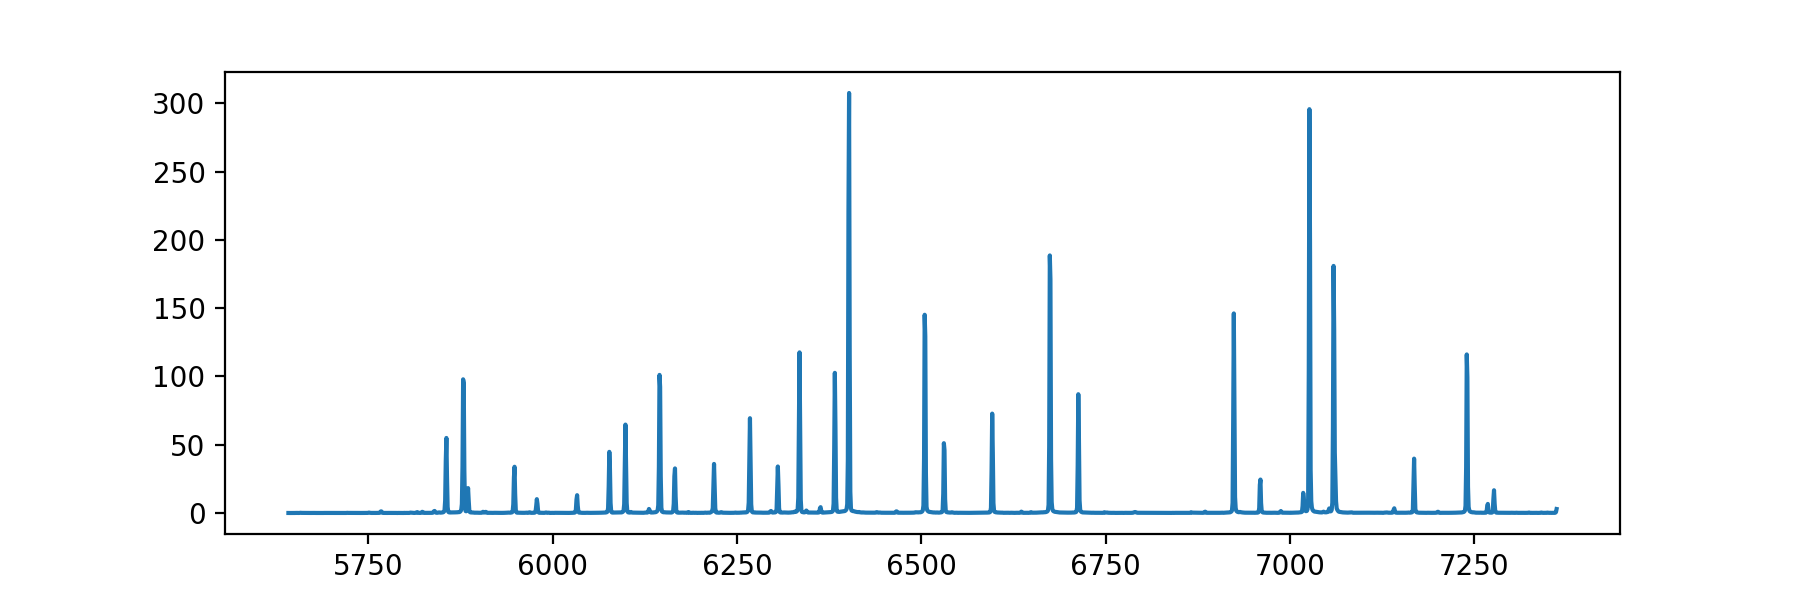

In [5]:
ll, ww = identify_widget(wapprox, flux)

In [6]:
ww

array([], dtype=float64)